In [ ]:
import pandas as pd

# Chargement du dataset
df = pd.read_csv(r"C:\Users\Cyrinechalghoumi\Desktop\blockchain\smart_grid_dataset1_clean.csv")

# Remplacer les points dans l'heure (ex: 17.30 → 17:30) si présents
df["Timestamp"] = df["Timestamp"].str.replace(".", ":", regex=False)

# Conversion automatique en datetime (formats mixtes)
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format='mixed', dayfirst=True, errors='coerce')

# Vérifier s'il y a eu des échecs de conversion
if df["Timestamp"].isnull().any():
    print("⚠️ Certaines lignes ont un format de date invalide :")
    print(df[df["Timestamp"].isnull()])

# Calcul des différences de temps
df["Time_Diff"] = df["Timestamp"].diff()

# Afficher les intervalles de temps uniques
unique_deltas = df["Time_Diff"].dropna().unique()
print("⏱️ Intervalles de temps uniques :")
print(unique_deltas)

# Vérification de régularité
if len(unique_deltas) == 1 and unique_deltas[0] == pd.Timedelta(minutes=15):
    print("✅ Les données sont bien espacées toutes les 15 minutes.")
else:
    print("❌ Les données ne sont PAS toutes espacées de 15 minutes.")


⏱️ Intervalles de temps uniques :
<TimedeltaArray>
['0 days 00:15:00']
Length: 1, dtype: timedelta64[ns]
✅ Les données sont bien espacées toutes les 15 minutes.


In [1]:
import pandas as pd

df = pd.read_csv('smart_grid_blockchain_fusion.csv')
print(df.info())              # Types de données, nulls
print(df.describe())          # Statistiques générales
print(df.isnull().sum())      # Valeurs manquantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   block_index                 50000 non-null  int64  
 1   num_tx                      50000 non-null  int64  
 2   Timestamp                   49999 non-null  float64
 3   time_since_last_block       50000 non-null  float64
 4   max_tx_per_sender           50000 non-null  int64  
 5   sender_concentration        50000 non-null  float64
 6   avg_amount                  50000 non-null  float64
 7   total_amount                50000 non-null  float64
 8   Reactive_Power(kVAR)        49999 non-null  float64
 9   Electricity_Price(USD/kWh)  49999 non-null  float64
 10  avg_amount_per_sender_mean  50000 non-null  float64
 11  Power_Consumption(kW)       49999 non-null  float64
 12  Energy_Consumption(kWh)     49999 non-null  float64
 13  is_anomaly                  500

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the CSV file
file = "smart_grid_blockchain_fusion.csv"
df = pd.read_csv(file)

# Display a preview
print("✅ Preview of the dataset smart_grid_blockchain_fusion.csv:")
display(df.tail(100))

#  Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

#  Compute statistics
stats = pd.DataFrame({
    "mean": df_numeric.mean(),
    "std": df_numeric.std(),         # standard deviation
    "min": df_numeric.min(),
    "max": df_numeric.max(),
    "variation": df_numeric.max() - df_numeric.min()
})

print(" Statistics of numeric columns:")
display(stats)


✅ Aperçu du dataset smart_grid_blockchain_fusion.csv :


,block_index,num_tx,Timestamp,time_since_last_block,max_tx_per_sender,sender_concentration,avg_amount,total_amount,Reactive_Power(kVAR),Electricity_Price(USD/kWh),avg_amount_per_sender_mean,Power_Consumption(kW),Energy_Consumption(kWh),is_anomaly,anomaly_type
49900,49901,20,642569003.0,6.773140,1,0.050000,0.182515,3.663778,1.564233,0.311006,0.175807,4.268761,1.067190,0,Normal
49901,49902,20,642569018.0,8.323663,1,0.050000,0.161560,3.188435,2.863662,0.296044,0.177370,9.283274,2.320819,0,Normal
49902,49903,30,642569033.0,3.120085,3,0.100000,0.290419,8.639866,1.480934,0.453049,0.287136,6.113543,1.528386,0,Normal
49903,49904,37,642569088.0,8.818252,2,0.054054,0.289466,10.796380,1.530886,0.461064,0.302803,7.636975,1.909244,0,Normal
49904,49905,48,642569103.0,8.825124,2,0.041667,0.105041,5.052971,0.736333,0.360721,0.110943,7.359517,1.839879,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,6,642578988.0,7.258889,2,0.333333,0.067388,0.411224,0.308268,0.342882,0.068997,1.696501,0.424125,0,Normal
49996,49997,15,642579003.0,5.495855,3,0.200000,0.152044,2.260164,1.631748,0.215314,0.157789,10.036335,2.509084,0,Normal
49997,49998,31,642579018.0,8.170402,3,0.096774,0.250738,7.716308,1.712672,0.147162,0.254748,10.699791,2.674948,0,Normal
49998,49999,41,642579033.0,9.115707,3,0.073171,0.256796,10.521407,1.050729,0.360774,0.232319,4.253821,1.063455,0,Normal


📈 Statistiques des colonnes numériques :


,mean,std,min,max,variation
block_index,2.500050e+04,1.443390e+04,1.000000e+00,5.000000e+04,4.999900e+04
num_tx,1.906715e+02,2.964941e+02,1.000000e+00,1.199000e+03,1.198000e+03
Timestamp,5.719182e+08,4.424064e+07,5.375471e+08,6.425790e+08,1.050319e+08
time_since_last_block,2.524338e+01,3.131076e+01,2.119103e+00,1.507420e+02,1.486229e+02
max_tx_per_sender,9.618482e+01,2.342267e+02,1.000000e+00,1.199000e+03,1.198000e+03
sender_concentration,2.569930e-01,3.375123e-01,3.584229e-03,1.000000e+00,9.964158e-01
avg_amount,1.793925e+00,6.944820e+00,1.001558e-04,3.997731e+01,3.997721e+01
total_amount,8.325769e+00,1.312112e+01,4.318169e-02,9.578728e+01,9.574410e+01
Reactive_Power(kVAR),1.584161e+00,9.648711e-01,1.136653e-01,4.684119e+00,4.570454e+00
Electricity_Price(USD/kWh),2.990926e-01,1.154951e-01,1.000021e-01,4.999958e-01,3.999937e-01


In [14]:
import pandas as pd

# 📥 Charger le fichier CSV original
fichier = "smart_grid_blockchain_fusion.csv"
df = pd.read_csv(fichier)

# ❌ Colonnes à exclure de la normalisation
cols_to_exclude = [
    'block_index',
    'Timestamp',
    'is_anomaly',
    'anomaly_type',
    'num_tx',
    'Energy_Consumption(kWh)'
]

# ✅ Colonnes numériques à normaliser avec Min-Max
cols_to_normalize = df.select_dtypes(include=['float64', 'int64']).columns.difference(cols_to_exclude)

# 🔁 Appliquer la normalisation Min-Max
df_minmax = df.copy()
df_minmax[cols_to_normalize] = df[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# 🧪 Vérification : tout doit être entre 0 et 1
print("✅ Vérification des valeurs normalisées :")
display(df_minmax[cols_to_normalize].describe())

# 💾 Sauvegarder dans un nouveau fichier
df_minmax.to_csv("smart_grid_minmax_normalized.csv", index=False)
print("📁 Fichier sauvegardé sous : smart_grid_minmax_normalized.csv")


✅ Vérification des valeurs normalisées :


,Electricity_Price(USD/kWh),Power_Consumption(kW),Reactive_Power(kVAR),avg_amount,avg_amount_per_sender_mean,max_tx_per_sender,sender_concentration,time_since_last_block,total_amount
count,49999.000000,49999.000000,49999.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.497734,0.475007,0.321739,0.044871,0.040943,0.079453,0.254320,0.155590,0.086508
std,0.288742,0.271476,0.211111,0.173719,0.158821,0.195515,0.338726,0.210673,0.137044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247300,0.237689,0.151318,0.000672,0.000611,0.000835,0.022136,0.031068,0.021343
50%,0.497326,0.476783,0.278502,0.003182,0.002893,0.000835,0.076691,0.053371,0.045084
75%,0.746606,0.710454,0.458552,0.005483,0.004989,0.001669,0.397842,0.202071,0.083766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


📁 Fichier sauvegardé sous : smart_grid_minmax_normalized.csv


In [17]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Charger le dataset normalisé
fichier = "smart_grid_minmax_normalized.csv"
df = pd.read_csv(fichier)

# Initialiser l'encodeur avec sparse_output=False pour éviter le warning
encoder = OneHotEncoder(sparse_output=False)

# Encodage one-hot sur la colonne 'anomaly_type'
encoded = encoder.fit_transform(df[["anomaly_type"]])

# Création du DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["anomaly_type"]))

# Concaténer avec le DataFrame original
df = pd.concat([df, encoded_df], axis=1)

# Supprimer la colonne texte originale 'anomaly_type' si souhaité
df.drop(columns=['anomaly_type'], inplace=True)

# Sauvegarder dans un nouveau fichier CSV
output_file = "smart_grid_tx_normalized_encoder.csv"
df.to_csv(output_file, index=False)

# Afficher un extrait des colonnes encodées pour vérification
print(df.filter(regex="anomaly_type_").head())

print(f"\n✅ Fichier avec encodage enregistré sous : {output_file}")



   anomaly_type_Breakdown  anomaly_type_DoS  anomaly_type_Normal  \
0                     0.0               0.0                  1.0   
1                     0.0               0.0                  1.0   
2                     0.0               0.0                  1.0   
3                     0.0               0.0                  1.0   
4                     0.0               0.0                  1.0   

   anomaly_type_Theft  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

✅ Fichier avec encodage enregistré sous : smart_grid_tx_normalized_encoder.csv


In [18]:
print(df.head())

   block_index  num_tx    Timestamp  time_since_last_block  max_tx_per_sender  \
0            1     209  537547103.0               0.065965           0.000000   
1            2     157  537547118.0               0.042296           0.001669   
2            3     189  537547133.0               0.062621           0.000835   
3            4     219  537547188.0               0.057819           0.000000   
4            5     241  537547203.0               0.043879           0.000835   

   sender_concentration  avg_amount  total_amount  Reactive_Power(kVAR)  \
0              0.001205    0.001016      0.088455              0.248195   
1              0.015580    0.000287      0.018342              0.585675   
2              0.007023    0.001174      0.091546              0.403308   
3              0.000986    0.000335      0.030081              0.111817   
4              0.004731    0.000943      0.093609              0.179892   

   Electricity_Price(USD/kWh)  avg_amount_per_sender_mean  \
0

In [ ]:
import hashlib
import pandas as pd
# Load the dataset
df = pd.read_csv("smart_grid_tx_normalized_encoder.csv")

# SHA-256 hash function
def generate_hash(row):
    data = f"{row['block_index']}{row.get('Timestamp', '')}{row['num_tx']}{row['Energy_Consumption(kWh)']}"
    return hashlib.sha256(str(data).encode()).hexdigest()

# Generate the hash for each row
df['block_hash'] = df.apply(generate_hash, axis=1)
# Sort by block_index and create previous_hash
df = df.sort_values(by='block_index').reset_index(drop=True)
df['previous_hash'] = df['block_hash'].shift(1)
df['previous_hash'].fillna('GENESIS_BLOCK', inplace=True)

# Ordered columns to keep (with your corrected list)
columns_ordered = [
    'block_index', 'num_tx', 'Timestamp', 'block_hash', 'previous_hash',
    'time_since_last_block', 'max_tx_per_sender', 'sender_concentration', 'avg_amount',
    'total_amount', 'Reactive_Power(kVAR)', 'Electricity_Price(USD/kWh)',
    'avg_amount_per_sender_mean', 'Power_Consumption(kW)', 'Energy_Consumption(kWh)',
    'is_anomaly', 'anomaly_type_Breakdown', 'anomaly_type_DoS', 'anomaly_type_Normal',
    'anomaly_type_Theft'
]

columns_to_keep = [col for col in columns_ordered if col in df.columns]
df_final = df[columns_to_keep]
# Save the final result
df_final.to_csv("smart_grid_tx_normalized_encoder_hash.csv", index=False)

print("✅ File 'smart_grid_tx_normalized_encoder_hash.csv' successfully generated.")
print(df_final.head())


✅ Fichier 'smart_grid_tx_normalized_encoder_hash.csv' généré avec succès.
   block_index  num_tx    Timestamp  \
0            1     209  537547103.0   
1            2     157  537547118.0   
2            3     189  537547133.0   
3            4     219  537547188.0   
4            5     241  537547203.0   

                                          block_hash  \
0  374d1dc3947612bca7d76e0e8a01960faea9f38a9bdf7e...   
1  bd09c9e7e78363d9a1be45349748cb2b5e3133bbab62eb...   
2  e99b8748140ff0d1b3b6d81bdcffd9cff6b359e1b8642a...   
3  e59fa2ac610e51b14b91dd2b7ea668c45d7ab79d546e74...   
4  de50b1263101879fdb8f8464e464abb2ae13109029f3ca...   

                                       previous_hash  time_since_last_block  \
0                                      GENESIS_BLOCK               0.065965   
1  374d1dc3947612bca7d76e0e8a01960faea9f38a9bdf7e...               0.042296   
2  bd09c9e7e78363d9a1be45349748cb2b5e3133bbab62eb...               0.062621   
3  e99b8748140ff0d1b3b6d81bdcffd9cff6b

In [1]:
import pandas as pd

# Charger le fichier généré précédemment
df = pd.read_csv("smart_grid_tx_normalized_encoder_hash.csv")

# Convertir le hash hexadécimal en chiffres uniquement
df["block_hash_numeric"] = df["block_hash"].apply(lambda x: int(x, 16))

# Convertir aussi le previous_hash (sauf pour le GENESIS_BLOCK)
df["previous_hash_numeric"] = df["previous_hash"].apply(
    lambda x: int(x, 16) if x != "GENESIS_BLOCK" else 0
)

# Réorganiser les colonnes
columns_ordered = [
    "block_index", "num_tx", "Timestamp",
    "block_hash_numeric", "previous_hash_numeric",
    "time_since_last_block", "max_tx_per_sender", "sender_concentration",
    "avg_amount", "total_amount", "Reactive_Power(kVAR)", "Electricity_Price(USD/kWh)",
    "avg_amount_per_sender_mean", "Power_Consumption(kW)", "Energy_Consumption(kWh)",
    "is_anomaly", "anomaly_type_Breakdown", "anomaly_type_DoS",
    "anomaly_type_Normal", "anomaly_type_Theft"
]

# Garder seulement les colonnes présentes
columns_to_keep = [c for c in columns_ordered if c in df.columns]
df_final = df[columns_to_keep]

# Enregistrer le nouveau CSV
df_final.to_csv("smart_grid_tx_normalized_encoder_hash1.csv", index=False)

print("✅ Fichier 'smart_grid_tx_normalized_encoder_hash1.csv' généré avec succès (hashs uniquement numériques).")
print(df_final.head())


✅ Fichier 'smart_grid_tx_normalized_encoder_hash1.csv' généré avec succès (hashs uniquement numériques).
   block_index  num_tx    Timestamp  \
0            1     209  537547103.0   
1            2     157  537547118.0   
2            3     189  537547133.0   
3            4     219  537547188.0   
4            5     241  537547203.0   

                                  block_hash_numeric  \
0  2501345931953603563511816258122087514687522427...   
1  8550442350896492797929595354215250260456041522...   
2  1056636886939274982799398726768281219339542232...   
3  1038616937391079556998208152112100798102312598...   
4  1005560227894096958547367094399010874141844460...   

                               previous_hash_numeric  time_since_last_block  \
0                                                  0               0.065965   
1  2501345931953603563511816258122087514687522427...               0.042296   
2  8550442350896492797929595354215250260456041522...               0.062621   
3  1056

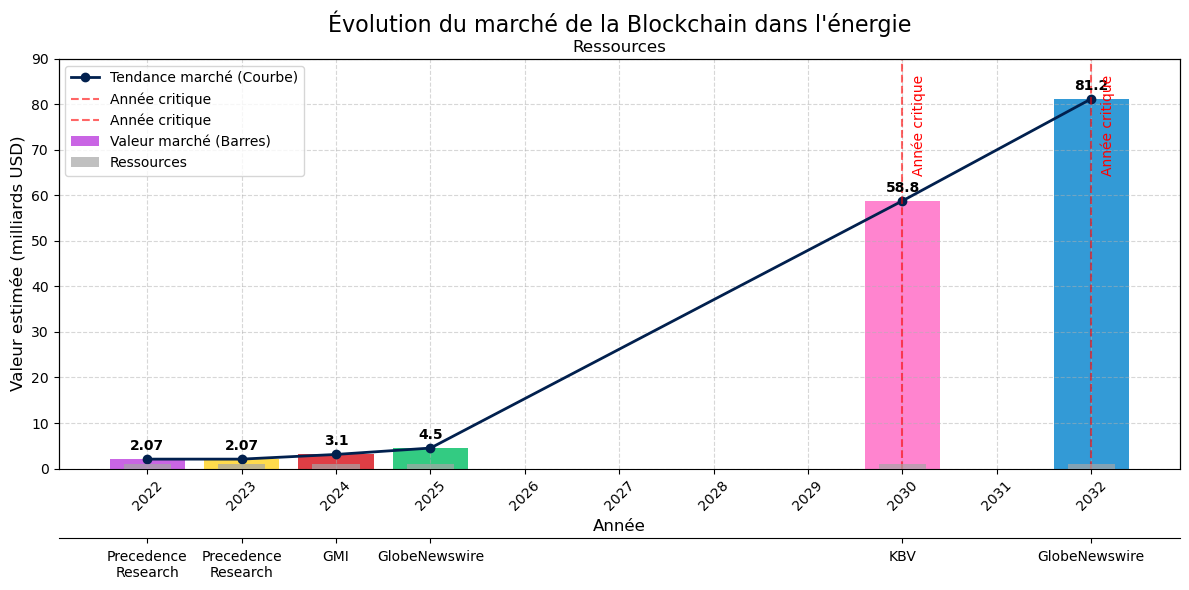

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Années principales et marché
years = np.array([2022, 2023, 2024, 2025, 2030, 2032])
market_values = np.array([2.07, 2.07, 3.1, 4.5, 58.8, 81.2])
sources = ["Precedence\nResearch", "Precedence\nResearch", "GMI", "GlobeNewswire", "KBV", "GlobeNewswire"]

# Couleurs
bar_colors = ['#bc3fde', "#ffd21f", "#d70d17", '#00bf63', '#ff66c4', '#0081cc']
source_colors = ['#a6a6a6']*len(years)

fig, ax = plt.subplots(figsize=(12,6))

# Barres principales (marché)
ax.bar(years, market_values, color=bar_colors, alpha=0.8, label='Valeur marché (Barres)')

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(market_values):
    ax.text(years[i], v + 2, f"{v}", ha='center', fontsize=10, fontweight='bold')

# Courbe pour la tendance
ax.plot(years, market_values, marker='o', color='#01204E', linewidth=2, label='Tendance marché (Courbe)')

# Titres et labels
ax.set_title("Évolution du marché de la Blockchain dans l'énergie", fontsize=16)
ax.set_xlabel("Année", fontsize=12)
ax.set_ylabel("Valeur estimée (milliards USD)", fontsize=12)
ax.set_ylim(0, 90)

# Axe x principal
ax.set_xticks(list(range(2022, 2033)))
ax.set_xticklabels(list(range(2022, 2033)), rotation=45)

# Années critiques
critical_years = [2030, 2032]
for year in critical_years:
    ax.axvline(x=year, color='red', linestyle='--', alpha=0.6, label='Année critique')  # ajouter label pour légende
    ax.text(year+0.1, max(market_values)*0.8, 'Année critique', color='red', rotation=90, fontsize=10)

# Grille
ax.grid(True, linestyle='--', alpha=0.5)

# Axe secondaire pour les ressources
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(years)
ax2.set_xticklabels(sources, rotation=45, fontsize=8, ha='center')
ax2.tick_params(axis='x', pad=5)
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))

# Ajouter une barre grise sous l'axe pour les ressources
ax2.bar(years, [1]*len(years), color=source_colors, width=0.5, alpha=0.7, label='Ressources')

# Nommer la ligne des ressources
ax2.set_xlabel("Ressources", fontsize=12, labelpad=5)

# Légendes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Fusionner légendes pour tout afficher
ax.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


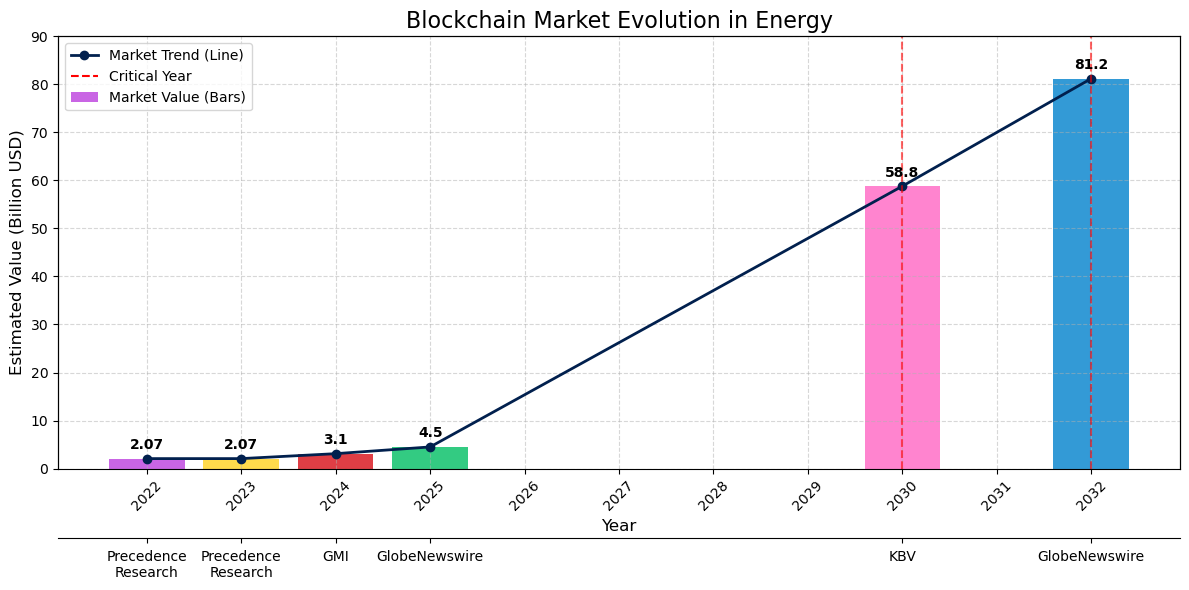

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Main years and market values
years = np.array([2022, 2023, 2024, 2025, 2030, 2032])
market_values = np.array([2.07, 2.07, 3.1, 4.5, 58.8, 81.2])
sources = ["Precedence\nResearch", "Precedence\nResearch", "GMI", "GlobeNewswire", "KBV", "GlobeNewswire"]

# Colors
bar_colors = ['#bc3fde', "#ffd21f", "#d70d17", '#00bf63', '#ff66c4', '#0081cc']

fig, ax = plt.subplots(figsize=(12,6))

# Main market bars
bars = ax.bar(years, market_values, color=bar_colors, alpha=0.8)

# Add values above bars
for i, v in enumerate(market_values):
    ax.text(years[i], v + 2, f"{v}", ha='center', fontsize=10, fontweight='bold')

# Trend line
trend_line, = ax.plot(years, market_values, marker='o', color='#01204E', linewidth=2)

# Critical years
critical_years = [2030, 2032]
for year in critical_years:
    ax.axvline(x=year, color='red', linestyle='--', alpha=0.6)

# Dummy line for legend (critical years)
critical_line = plt.Line2D([], [], color='red', linestyle='--')

# Titles and labels
ax.set_title("Blockchain Market Evolution in Energy", fontsize=16)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Estimated Value (Billion USD)", fontsize=12)
ax.set_ylim(0, 90)
ax.set_xticks(list(range(2022, 2033)))
ax.set_xticklabels(list(range(2022, 2033)), rotation=45)

# Grid
ax.grid(True, linestyle='--', alpha=0.5)

# Secondary axis for sources
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(years)
ax2.set_xticklabels(sources, rotation=45, fontsize=8, ha='center')
ax2.tick_params(axis='x', pad=5)
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))

# Custom legend with only 3 items
ax.legend([trend_line, critical_line, bars[0]], 
          ['Market Trend (Line)', 'Critical Year', 'Market Value (Bars)'],
          loc='upper left')

plt.tight_layout()
plt.show()
